In [95]:
from skimage import io, viewer, exposure
import numpy as np
import matplotlib.pyplot as plt

In [96]:
img = io.imread("image.jpg" ,as_grey= True)

In [97]:
img.shape

(897, 1168)

Frist 5 columns of the image [[88. 85. 82. 80. 81.]
 [88. 85. 88. 85. 84.]
 [81. 81. 87. 86. 83.]
 [86. 87. 88. 87. 83.]
 [86. 90. 85. 86. 83.]]


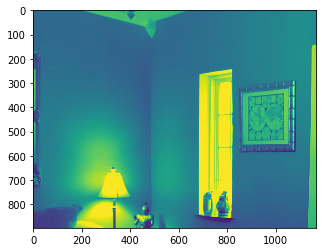

In [98]:
print("Frist 5 columns of the image", img[:5,:5] * 255)
plt.imshow(img)

In [99]:
def convolve2d(image, kernel):
    
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros_like(image)
    
    image_padded =np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1]= image
    
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y,x] = (kernel * image_padded[y:y+3,x:x+3]).sum()
    print("new Shape")
    print(output.shape)
    return output

            

/home/elie/.pyenv/versions/3.6.0/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


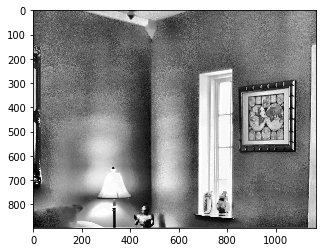

In [100]:
image_equalized = exposure.equalize_adapthist(img/np.max(np.abs(img)), clip_limit=0.03)
plt.imshow(image_equalized, cmap = plt.cm.gray)

In [101]:
sharp_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
gaussian_kernel = (1/16) * np.array([[1,2,1],[2,4,2],[1,2,1]])

In [102]:
image_sharpen = convolve2d(img, sharp_kernel)
image_edge = convolve2d(img, edge_kernel)
image_blurred= convolve2d(img, gaussian_kernel)

new Shape
(897, 1168)
new Shape
(897, 1168)
new Shape
(897, 1168)


In [103]:
print("\ First columns and rows of the sharpen image", image_sharpen[:5,:5]*255)
print("\ First columns and rows of the edge image", image_edge[:5,:5]*255)
print("\ First columns and rows of the blured image", image_blurred[:5,:5]*255)

\ First columns and rows of the sharpen image [[267. 170. 157. 152. 160.]
 [186.  83. 101.  87.  86.]
 [150.  65.  92.  88.  74.]
 [176.  90.  94.  92.  75.]
 [172. 105.  79.  91.  77.]]
\ First columns and rows of the edge image [[ 4.46000000e+02  2.49000000e+02  2.33000000e+02  2.20000000e+02
   2.33000000e+02]
 [ 2.84000000e+02  2.83106871e-14  3.30000000e+01  9.00000000e+00
   3.00000000e+00]
 [ 2.21000000e+02 -4.20000000e+01  9.00000000e+00  3.00000000e+00
  -2.10000000e+01]
 [ 2.63000000e+02  1.20000000e+01  1.50000000e+01  1.50000000e+01
  -2.10000000e+01]
 [ 2.56000000e+02  3.70000000e+01 -1.10000000e+01  1.20000000e+01
  -1.60000000e+01]]
\ First columns and rows of the blured image [[48.9375 64.125  62.75   61.75   61.5   ]
 [64.125  85.125  85.125  84.3125 83.6875]
 [62.875  84.625  86.125  85.6875 84.875 ]
 [63.9375 86.0625 86.6875 85.75   84.8125]
 [64.625  86.75   86.0625 84.9375 84.375 ]]


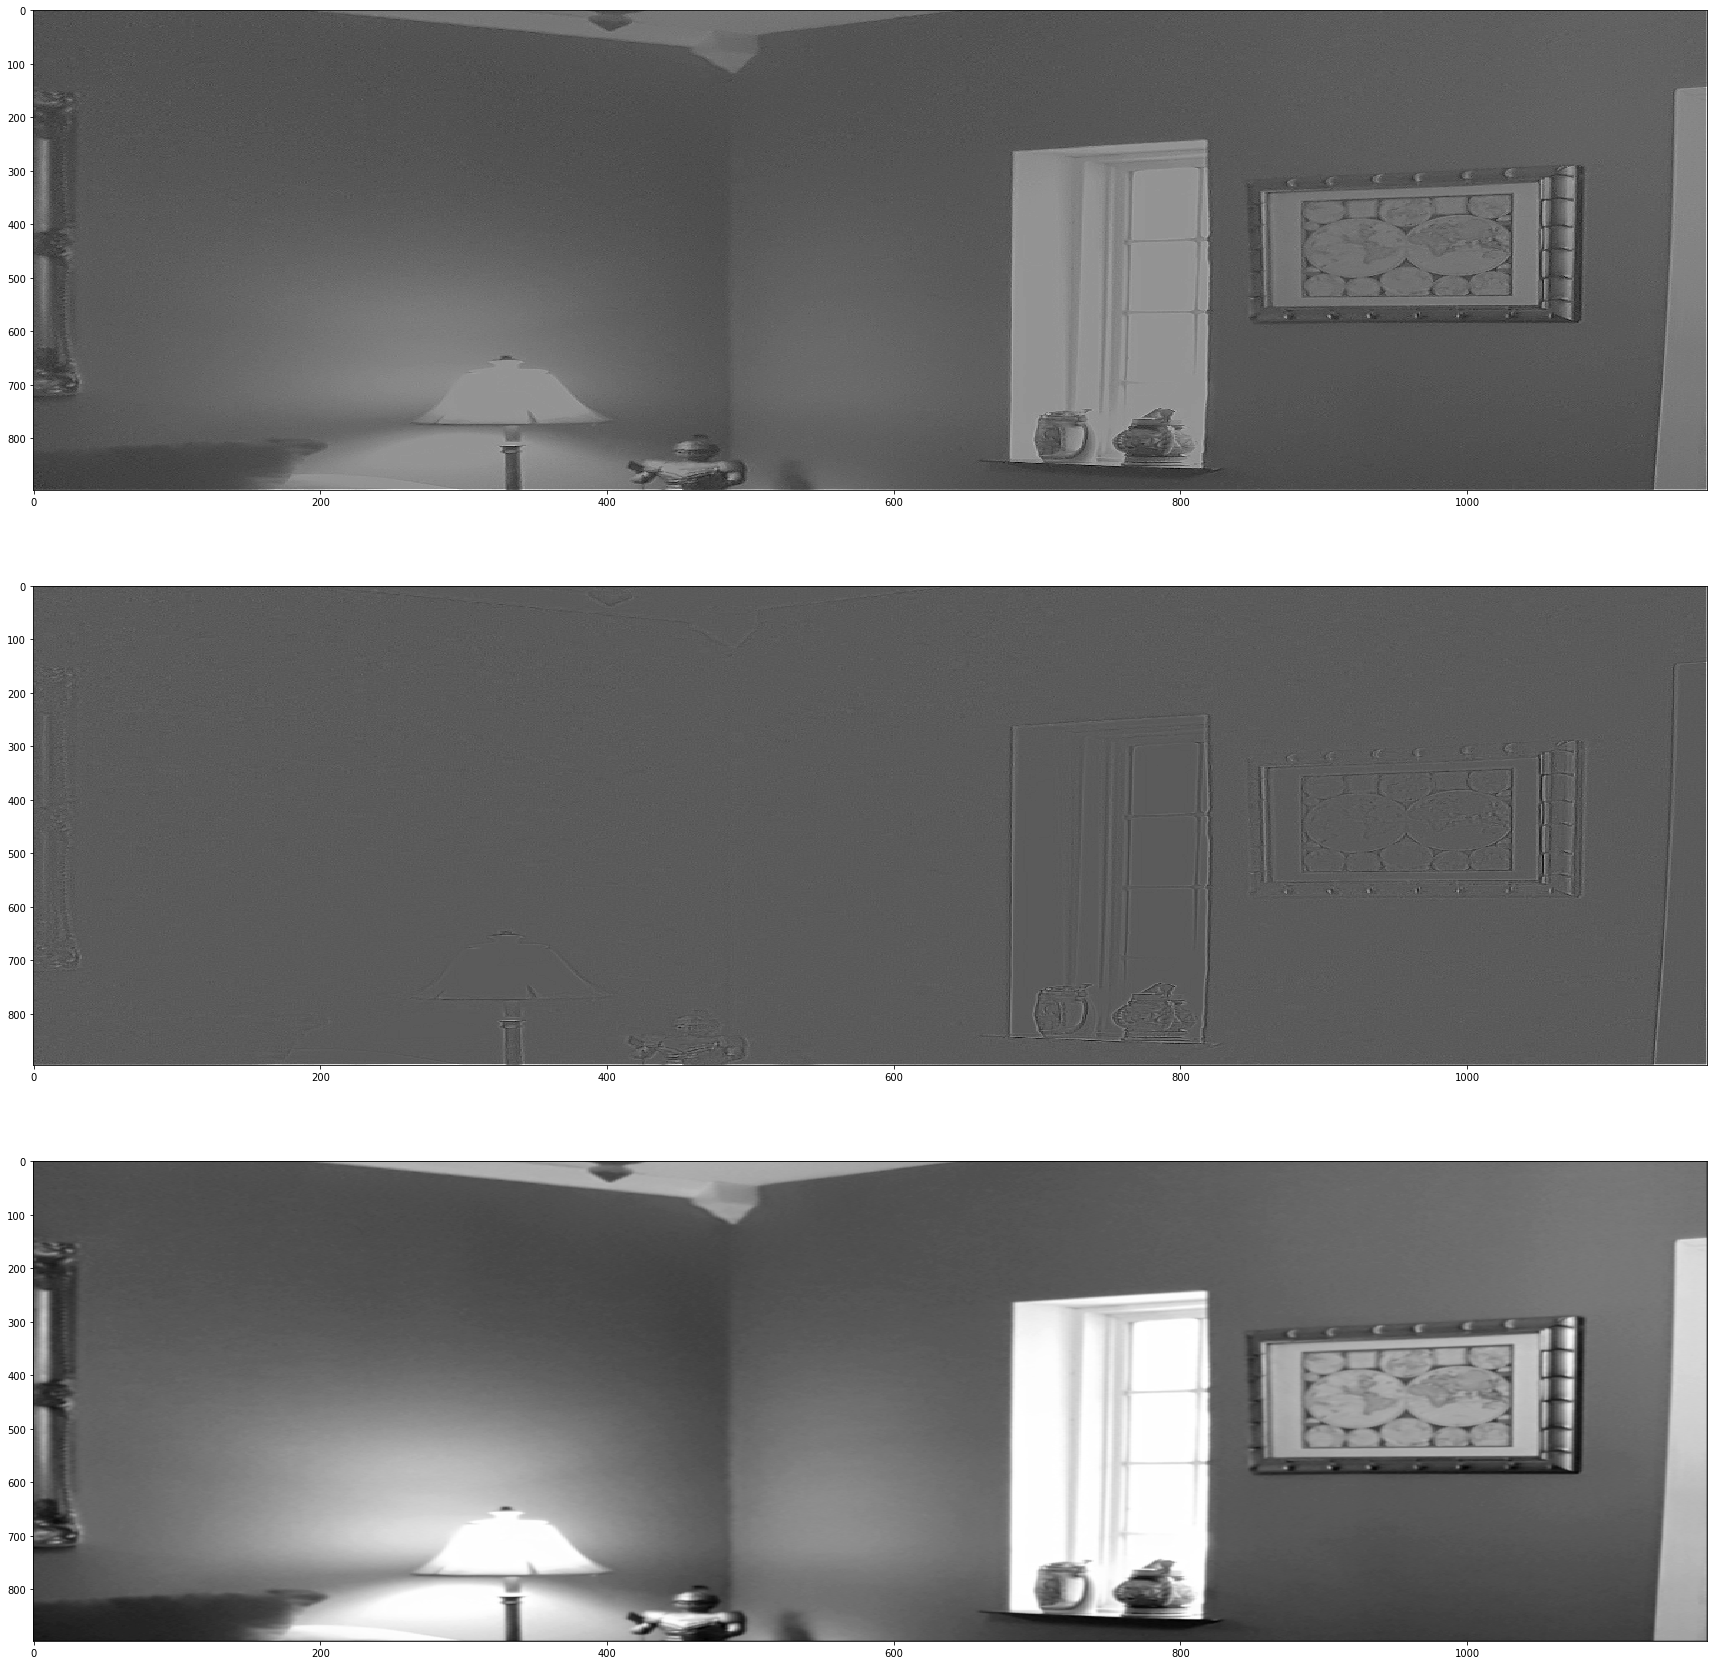

In [104]:
img_list = [image_sharpen, image_edge,image_blurred]
img_name= ["sharpen" , "edge", "Blurred"]
fig = plt.figure(figsize=(30,30))
for i in range(1,4):
    fig.add_subplot(3,1, i)
    plt.imshow(img_list[i-1] , interpolation="nearest", aspect ="auto",  cmap=plt.cm.gray)
